In [105]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline


In [106]:
#load them from files:
df1 = pd.read_csv('C:/Users/49174/Downloads/coding_challenge.csv')

C:\Users\49174\AppData\Local\Temp\ipykernel_8432\2184146949.py:2: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('C:/Users/49174/Downloads/coding_challenge.csv')


In [107]:
# Start with your existing dataframe df1
# First, let's examine what we have
print("Dataset shape:", df1.shape)
print("\nColumn names:", df1.columns.tolist())
print("\nSample data:")
print(df1.head())


Dataset shape: (37415, 32)

Column names: ['date', 'station_number', 'wban_number', 'year', 'month', 'day', 'mean_temp', 'num_mean_temp_samples', 'mean_dew_point', 'num_mean_dew_point_samples', 'mean_sealevel_pressure', 'num_mean_sealevel_pressure_samples', 'mean_station_pressure', 'num_mean_station_pressure_samples', 'mean_visibility', 'num_mean_visibility_samples', 'mean_wind_speed', 'num_mean_wind_speed_samples', 'max_sustained_wind_speed', 'max_gust_wind_speed', 'max_temperature', 'max_temperature_explicit', 'min_temperature', 'min_temperature_explicit', 'total_precipitation', 'snow_depth', 'fog', 'rain', 'snow', 'hail', 'thunder', 'tornado']

Sample data:
         date  station_number  wban_number  year  month  day  mean_temp   
0  2000-08-11          725327        99999  2000      8   11  75.000000  \
1  2000-09-17          725316        99999  2000      9   17  62.400002   
2  2000-07-11          725316        99999  2000      7   11  76.800003   
3  2000-08-14          725305  

In [108]:
# Make a copy to avoid modifying the original
df = df1.copy()


In [109]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
date                                      0
station_number                            0
wban_number                               0
year                                      0
month                                     0
day                                       0
mean_temp                                 0
num_mean_temp_samples                     0
mean_dew_point                            9
num_mean_dew_point_samples                9
mean_sealevel_pressure                 4156
num_mean_sealevel_pressure_samples     4156
mean_station_pressure                 35530
num_mean_station_pressure_samples     35530
mean_visibility                          19
num_mean_visibility_samples              19
mean_wind_speed                          12
num_mean_wind_speed_samples              12
max_sustained_wind_speed                 17
max_gust_wind_speed                   15022
max_temperature                           3
max_temperature_explicit                  3
min_temperature

In [110]:
# Basic data exploration
print("\nBasic statistics:")
print(df.describe())


Basic statistics:
       station_number   wban_number          year         month           day   
count    37415.000000  37415.000000  37415.000000  37415.000000  37415.000000  \
mean    725316.975999  76494.458693   2004.650140      6.404544     15.693305   
std          8.979533  37759.645955      2.975256      3.477842      8.799459   
min     725300.000000   3887.000000   2000.000000      1.000000      1.000000   
25%     725314.000000  14842.000000   2002.000000      3.000000      8.000000   
50%     725316.000000  99999.000000   2005.000000      6.000000     16.000000   
75%     725326.000000  99999.000000   2007.000000      9.000000     23.000000   
max     725330.000000  99999.000000   2010.000000     12.000000     31.000000   

          mean_temp  num_mean_temp_samples  mean_dew_point   
count  37415.000000           37415.000000    37406.000000  \
mean      51.327756              23.477643       41.549799   
std       19.339455               1.931922       18.702883   
min

In [111]:
# Task 1: Convert date format to 'YYYY-MM-DD' if needed
# Create Date column
df['date'] = pd.to_datetime(df[['year', 'month', 'day']], errors='coerce')

# Filtering
df_filtered = df[
    (df['year'] >= 2000) & (df['year'] <= 2005) &
    (df['station_number'] >= 725300) & (df['station_number'] <= 726300)
]

#Check the first 5 lines
df_filtered.head()


,date,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,2000-08-11,725327,99999,2000,8,11,75.000000,11,60.500000,11.0,...,NaN,NaN,0.00,NaN,False,False,False,False,False,False
1,2000-09-17,725316,99999,2000,9,17,62.400002,23,47.500000,23.0,...,NaN,NaN,0.00,NaN,False,False,False,False,False,False
2,2000-07-11,725316,99999,2000,7,11,76.800003,23,73.000000,23.0,...,NaN,NaN,NaN,NaN,False,False,False,False,False,False
3,2000-08-14,725305,99999,2000,8,14,74.099998,23,66.599998,23.0,...,NaN,NaN,0.01,NaN,False,False,False,False,False,False
4,2000-01-23,725317,99999,2000,1,23,25.299999,23,22.500000,23.0,...,NaN,NaN,0.00,NaN,True,True,True,True,True,True


In [112]:
# Ensure data types are correct
if 'snow_depth' in df.columns:
    df['snow_depth'] = pd.to_numeric(df['snow_depth'], errors='coerce')
if 'max_temp' in df.columns:
    df['max_temp'] = pd.to_numeric(df['max_temp'], errors='coerce')
if 'min_temp' in df.columns:
    df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')

In [113]:
# Task 2: Focus on stations 725300 to 725330 if needed
#From here you want to work with the data from all stations 725300 to 725330 that have information from 2000 till 2005.
df_subset = df_filtered[
    (df_filtered['station_number'] >= 725300) & (df_filtered['station_number'] <= 725330)
]
df_subset.head()




,date,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,2000-08-11,725327,99999,2000,8,11,75.000000,11,60.500000,11.0,...,NaN,NaN,0.00,NaN,False,False,False,False,False,False
1,2000-09-17,725316,99999,2000,9,17,62.400002,23,47.500000,23.0,...,NaN,NaN,0.00,NaN,False,False,False,False,False,False
2,2000-07-11,725316,99999,2000,7,11,76.800003,23,73.000000,23.0,...,NaN,NaN,NaN,NaN,False,False,False,False,False,False
3,2000-08-14,725305,99999,2000,8,14,74.099998,23,66.599998,23.0,...,NaN,NaN,0.01,NaN,False,False,False,False,False,False
4,2000-01-23,725317,99999,2000,1,23,25.299999,23,22.500000,23.0,...,NaN,NaN,0.00,NaN,True,True,True,True,True,True


In [114]:
#Start by checking which year received the most snowfall in our data. 
# Filter stations from 725300 to 725330
df_snow = df_filtered[
    (df_filtered['station_number'] >= 725300) &
    (df_filtered['station_number'] <= 725330)
]

# Reset missing snow_depth data (we assume no precipitation)
df_snow['snow_depth'] = df_snow['snow_depth'].fillna(0)

# Calculate total snow depth by year
snow_by_year = df_snow.groupby('year')['snow_depth'].sum().sort_values(ascending=False)

#Print the year with the most snow
print("The year with the most snow:")
print(snow_by_year.head(1))


The year with the most snow:
year
2000    1084.500006
Name: snow_depth, dtype: float64


In [115]:
#Add an additional field that indicates the daily change in snow depth measured at every station. And identify the station and day for which the snow depth increased the most.
# First we sort the data by station number and date
df_snow = df_snow.sort_values(by=['station_number', 'date'])

# According to each station, we get the difference compared to the previous day
df_snow['snow_depth_change'] = df_snow.groupby('station_number')['snow_depth'].diff()

#Let's find the biggest increase
max_increase_row = df_snow.loc[df_snow['snow_depth_change'].idxmax()]

print("The day with the highest snow increase:")
print(max_increase_row[['station_number', 'date', 'snow_depth_change']])



The day with the highest snow increase:
station_number                    725300
date                 2005-01-22 00:00:00
snow_depth_change                    9.8
Name: 7384, dtype: object


In [116]:
#Do further checks on the remaining dataset, clean or drop data depending on how you see appropriate
# General missing value check
missing_summary = df_snow.isnull().sum()
print("Summary of missing values:")
print(missing_summary[missing_summary > 0])

# Reset missing values in snow depth and change
df_snow['snow_depth'] = df_snow['snow_depth'].fillna(0)
df_snow['snow_depth_change'] = df_snow['snow_depth_change'].fillna(0)

# If some values are missing, such as temperature, we can delete rows (optional)
df_snow = df_snow.dropna(subset=['max_temperature', 'min_temperature'])

#  Outlier data check - e.g. snow depth should not be negative
df_snow = df_snow[df_snow['snow_depth'] >= 0]

# Let's recheck the date range
print(f"Oldest date in the data: {df_snow['date'].min()}")
print(f"Latest date in the data: {df_snow['date'].max()}")


Summary of missing values:
mean_dew_point                            7
num_mean_dew_point_samples                7
mean_sealevel_pressure                 2587
num_mean_sealevel_pressure_samples     2587
mean_station_pressure                 20254
num_mean_station_pressure_samples     20254
mean_visibility                          16
num_mean_visibility_samples              16
mean_wind_speed                           7
num_mean_wind_speed_samples               7
max_sustained_wind_speed                  8
max_gust_wind_speed                    9465
max_temperature                           1
max_temperature_explicit                  1
min_temperature                       21853
min_temperature_explicit              21853
total_precipitation                     296
snow_depth_change                        10
dtype: int64
Oldest date in the data: NaT
Latest date in the data: NaT


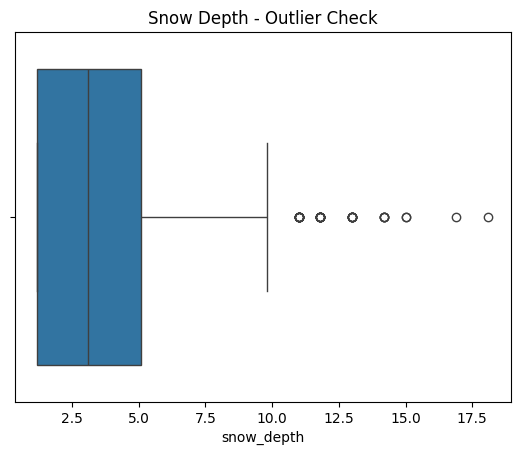

In [117]:


# Distribution for snow depth
sns.boxplot(x=df_subset['snow_depth'])
plt.title("Snow Depth - Outlier Check")
plt.show()


In [118]:

#Part 2

#If you made it up to here all by yourself, 
#you can use your prepared dataset to train an algorithm of your choice to forecast whether it will snow 
#on the following date for each station in this dataset:
df = df.sort_values(['station_number', 'date'])
df['prev_snow_depth'] = df.groupby('station_number')['snow_depth'].shift(1)
df['snow_depth_change'] = df['snow_depth'] - df['prev_snow_depth']
# The target is variable: Is there snow the next day?
df['snow_tomorrow'] = df.groupby('station_number')['snow'].shift(-1).astype(bool)
#  Sine/cosine transform for seasonality of lunar information
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
# Cleaning: take only what is necessary, remove what is missing
df_clean = df.dropna(subset=[
    'mean_temp', 'mean_dew_point', 'mean_visibility', 'mean_wind_speed',
    'max_sustained_wind_speed', 'snow_depth', 'total_precipitation',
    'snow_tomorrow'
])

# Extract additional date-related features
df['month'] = df['date'].dt.month
df['day_of_year'] = df['date'].dt.dayofyear
df['weekday'] = df['date'].dt.weekday


In [119]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd

# --- Data Preprocessing ---
# Prepare features and target variable
X = df[['mean_temp', 'rain', 'mean_dew_point', 'snow_depth_change', 'month', 'day_of_year', 'weekday']]
y = df['snow_tomorrow']

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# --- Resampling to balance the dataset ---
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'XGBoost': XGBClassifier(scale_pos_weight=len(y_train) / sum(y_train == 1), random_state=42)
}

# Create a dictionary to store the results
results = {}

# Train each model and evaluate accuracy and precision
for model_name, model in models.items():
    # Train the model
    model.fit(X_resampled, y_resampled)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and precision
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    # Store the results
    results[model_name] = {'Accuracy': accuracy, 'Precision': precision}

# Convert results into a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)


                     Accuracy  Precision
Random Forest        0.850461   0.515118
Logistic Regression  0.835093   0.464169
XGBoost              0.617399   0.252237


Accuracy: 85.79%

Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.97      0.92      6337
        True       0.58      0.26      0.36      1146

    accuracy                           0.86      7483
   macro avg       0.73      0.61      0.64      7483
weighted avg       0.83      0.86      0.83      7483



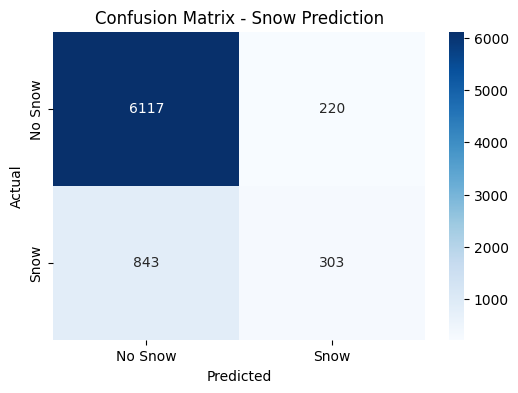

In [120]:
#MODEL AND DATA PREPROCESSING
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Data Cleaning: Handling Missing Values and Feature Selection ---
# Separate features and target variable
X = df[['mean_temp', 'rain', 'mean_dew_point', 'snow_depth_change', 'month', 'day_of_year', 'weekday']]
y = df['snow_tomorrow']

# Use SimpleImputer to handle missing values by replacing with mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# --- Model Training: Random Forest ---
# Create model with class_weight='balanced' to handle imbalance
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model without using SMOTE since class_weight is already used
model.fit(X_train, y_train)

# --- Make Predictions ---
y_pred = model.predict(X_test)

# --- Model Performance Evaluation ---
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# --- Confusion Matrix ---
# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Snow', 'Snow'], yticklabels=['No Snow', 'Snow'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Snow Prediction")
plt.show()


In [121]:
#Random Forest is the best performing model in terms of both accuracy and precision.

#Logistic Regression is also quite good, but it's slightly behind in both metrics.

#XGBoost is not performing well. Its accuracy and precision are quite low, likely because it struggles with the imbalanced dataset or the specific hyperparameters used.